# Lab 1 : Grey Scaling & Filters
#### Name:- Sruthi Nayagi 
#### Reg.no:- 19BAI1037 
#### Subject:- Computer Vision in Healthcare Application (CSE4038) 
#### Faculty-In-Charge:- Dr.BALASUNDARAM A
#### Lab Slot:- L27+L28 
#### Date of Examination:- 22/1/2022

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import pylab
from scipy import ndimage
from google.colab.patches import cv2_imshow
from skimage.util import random_noise

In [2]:
image = cv2.imread('/content/drive/MyDrive/insect.jpg')
image = cv2.resize(image, (256, 256))
cv2.imwrite('Original Image.png',image)

True

In [3]:
def gray_scale():
    #image = cv2.imread('/content/drive/MyDrive/insect.jpg')
    #image = cv2.resize(image, (256, 256))
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2.imwrite('gray_image.png',gray_image)
    cv2_imshow(image)
    cv2_imshow(gray_image) 
    cv2.waitKey(0)             
    cv2.destroyAllWindows()

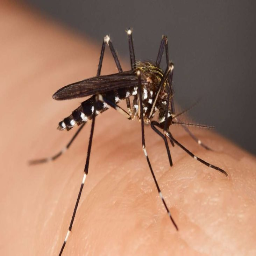

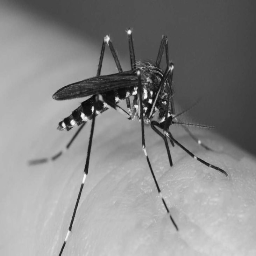

In [4]:
gray_scale()

Noise

Salt and Pepper

In [5]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
row,col = gray.shape
s_vs_p = 1
amount = 0.004
saltPepperNoise = np.copy(gray)
# Salt mode
num_salt = np.ceil(amount * gray.size * s_vs_p)
coords = [np.random.randint(0, i - 1, int(num_salt))
        for i in gray.shape]
saltPepperNoise[coords] = 1

# Pepper mode
num_pepper = np.ceil(amount* gray.size * (1. - s_vs_p))
coords = [np.random.randint(0, i - 1, int(num_pepper))
        for i in gray.shape]
saltPepperNoise[coords] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  app.launch_new_instance()


True

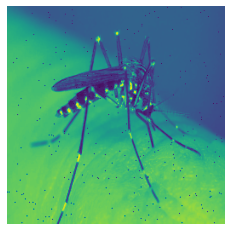

In [6]:
plt.imshow(saltPepperNoise)
plt.axis("off")
cv2.imwrite('salt&pepperNoise.png',saltPepperNoise)

Gaussian

In [7]:
gaussianNoise = random_noise(image, mode="gaussian")

True

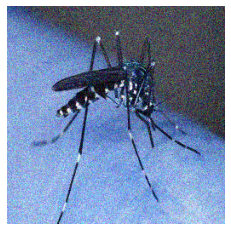

In [8]:
plt.imshow(gaussianNoise)
plt.axis("off")
cv2.imwrite('gaussianNoise.png',gaussianNoise)

Poisson

True

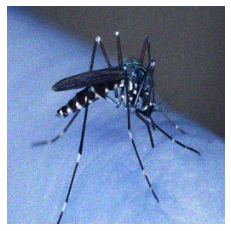

In [9]:
poissonNoise = random_noise(image, mode="poisson")
plt.imshow(poissonNoise)
plt.axis("off")
cv2.imwrite('poissonNoise.png',poissonNoise)

Spectacle Noise

In [10]:
row,col,ch = image.shape
speckle = np.random.randn(row,col,ch)
speckle = speckle.reshape(row,col,ch)        
spectacleNoise = image + image * speckle

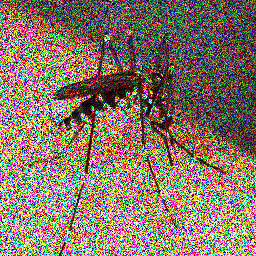

True

In [11]:
cv2_imshow(spectacleNoise)
cv2.imwrite('spectacleNoise.png',spectacleNoise)

Filters

Gaussian Blur

In [17]:
def gaussian():
    image = cv2.imread('/content/gray_image.png')
    cv2.getGaussianKernel(9,9)
    blur= cv2.GaussianBlur(image,(5,5),0)
    cv2.imwrite('blur.png',blur)
    plt.subplot(121),plt.imshow(image),plt.title('original')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(blur),plt.title('blur')
    plt.xticks([]), plt.yticks([])
    plt.show()
    cv2.imwrite('gaussianBlur.png',blur)

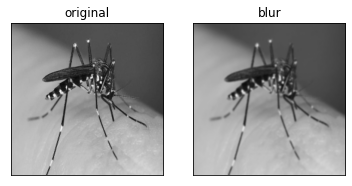

In [18]:
gaussian()

Average Filter

In [19]:
def averagefilter():
    image=cv2.imread('/content/gray_image.png')
    kernel=np.ones((5,5),np.float32)/25
    dst= cv2.filter2D(image,-1,kernel)
    plt.subplot(121),plt.imshow(image),plt.title('blur')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(dst),plt.title('averaged')
    plt.xticks([]), plt.yticks([])
    plt.show()
    cv2.imwrite('averagedFilter.png',dst)

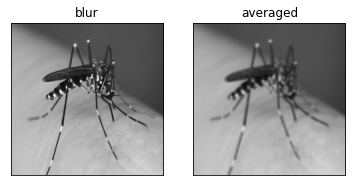

In [20]:
averagefilter()

Median Filter

In [31]:
def medianfilter():
    image=cv2.imread('/content/gray_image.png')
    dst= cv2.medianBlur(np.float32(image),5)
    plt.subplot(121),plt.imshow(image),plt.title('blur')
    plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(dst.astype('uint8')),plt.title('median')
    plt.xticks([]), plt.yticks([])
    plt.show()
    cv2.imwrite('medianFilter.png',dst)

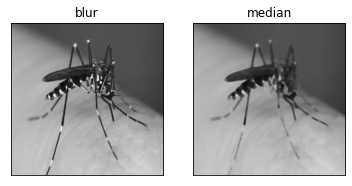

In [32]:
medianfilter()

**Conclusion:**
Gaussian Blur can be applied to supress the noises in the images as it gives a better image than the other filters.